In [1]:
#import dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io
import os
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import plotly.express as px
import seaborn as sns
# set seaborn theme
sns.set_style(style="whitegrid")

In [2]:
# Import the Dataset
%run Connect_Database.ipynb

Enter database password········
('INTC', 17.0, 4.0, 6.0, 7.0, datetime.datetime(2022, 2, 1, 0, 0), 'LAG_PERF', 'Semiconductors', 3.0, 31, 14.57, 'Customer Incidents,Business Ethics Incidents', 11.6, 21.21967741935484, 32.93, 2.53, 8.044999999999998, 16.08, 2.62, 6.166333333333333, 9.51, 4.79, 6.668666666666666, 9.67, 0.0, 1.1290322580645162, 4.0, 'None')


In [3]:
# To show the table
Stocks_with_ESG=esg_info_df
Stocks_with_ESG

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,bookValue,returnOnAssets,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap
0,INTC,17.0,4.0,6.0,7.0,2022-02-01,LAG_PERF,Semiconductors,3.0,31,...,22.151,0.08586,0.22522,39784168,33249492,51.8300,43.63,68.49,51.8300,210792628224
1,MSFT,13.0,0.0,8.0,5.0,2022-02-01,LAG_PERF,Software & Services,3.0,105,...,21.335,0.15249,0.49051,37807347,14327104,307.1974,231.10,349.67,307.1974,2306201616384
2,BAC,27.0,2.0,14.0,11.0,2022-02-01,Not Available,Banks,3.0,175,...,30.374,0.01068,0.11778,55160016,19239484,43.0200,36.51,50.11,43.0200,346950303744
3,AAPL,16.3,0.6,6.9,8.8,2022-02-01,UNDER_PERF,Technology Hardware,3.0,55,...,4.402,0.19875,1.45567,93700745,51356493,174.2850,118.86,182.94,174.2900,2844308013056
4,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,10.619,0.17199,0.44832,52434636,24961081,276.8399,127.00,346.47,276.8399,689885020160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,DLR,13.0,3.2,3.7,6.1,2022-02-01,UNDER_PERF,Real Estate,0.0,108,...,58.279,0.01308,0.09442,1634014,819189,138.2300,130.10,178.22,138.2300,39227875328
61,COF,23.2,0.1,13.5,9.7,2022-02-01,AVG_PERF,Diversified Financials,4.0,89,...,133.911,0.02959,0.20556,3024740,2240666,135.8800,122.43,177.95,135.8800,57833521152
62,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,17.547,0.10162,0.63223,3214070,1679729,96.3000,85.58,141.97,96.3000,23166023680
63,KMB,22.2,8.1,7.8,6.4,2022-02-01,AVG_PERF,Household Products,2.0,28,...,1.526,0.10050,2.29639,2023524,1778481,120.2800,117.32,145.79,120.2800,40525701120


In [4]:
# Import the stock info
df=esg_info_df

In [5]:
# Get average P/E dataframe
average_df=df.groupby('industry').mean()
pe_average_df=average_df.filter(['trailingPE','industry'], axis=1)
pe_average_df

,trailingPE
industry,
Aerospace & Defense,18.529438
Automobiles,23.099579
Banks,9.544439
Building Products,9.939586
Chemicals,37.557640
Commercial Services,8.234231
Diversified Financials,16.652937
Food Products,24.509838
Healthcare,26.381974


In [6]:
# Get average P/S dataframe
average_df=df.groupby('industry').mean()
ps_average_df=average_df.filter(['priceToSalesTrailing12Months','industry'], axis=1)
ps_average_df

,priceToSalesTrailing12Months
industry,
Aerospace & Defense,1.943653
Automobiles,0.482746
Banks,2.875553
Building Products,1.136477
Chemicals,2.792942
Commercial Services,2.267757
Diversified Financials,4.632819
Food Products,2.684802
Healthcare,2.357364


In [7]:
#Merge the industried average to CSV
stock_df = pd.merge(df, ps_average_df,on='industry',suffixes=['','_In_Average'])
stock_df = pd.merge(stock_df, pe_average_df,on='industry',suffixes=['','_In_Average'])
stock_df

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,priceToSalesTrailing12Months_In_Average,trailingPE_In_Average
0,INTC,17.0,4.0,6.0,7.0,2022-02-01,LAG_PERF,Semiconductors,3.0,31,...,0.22522,39784168,33249492,51.8300,43.63,68.49,51.8300,210792628224,9.622602,30.860748
1,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,0.44832,52434636,24961081,276.8399,127.00,346.47,276.8399,689885020160,9.622602,30.860748
2,AMAT,12.0,4.0,3.0,5.0,2022-02-01,LAG_PERF,Semiconductors,1.0,31,...,0.51593,8465944,6073416,137.0600,114.39,167.06,137.0600,121779593216,9.622602,30.860748
3,QCOM,18.0,5.8,4.4,7.8,2022-02-01,UNDER_PERF,Semiconductors,4.0,31,...,1.06739,10812259,7203782,157.9700,122.17,193.58,157.9700,176926408704,9.622602,30.860748
4,MSFT,13.0,0.0,8.0,5.0,2022-02-01,LAG_PERF,Software & Services,3.0,105,...,0.49051,37807347,14327104,307.1974,231.10,349.67,307.1974,2306201616384,8.626790,33.055841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,LOW,11.7,3.7,4.6,3.3,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,6.57829,3853954,6832850,212.9200,182.08,263.31,212.9200,143454208000,0.974595,13.939356
61,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,0.63223,3214070,1679729,96.3000,85.58,141.97,96.3000,23166023680,0.974595,13.939356
62,NLSN,23.0,0.1,16.9,6.0,2022-02-01,AVG_PERF,Commercial Services,1.0,32,...,0.19481,6149372,1867500,22.0101,16.02,28.42,22.0101,7937150464,2.267757,8.234231
63,ECL,24.1,9.5,8.4,6.2,2022-02-01,AVG_PERF,Chemicals,2.0,77,...,0.17579,1623990,1475869,177.5900,154.85,238.93,177.5900,50891431936,2.792942,37.557640


In [8]:
# rename columns of the P/E and P/S name 
stock_df = stock_df.rename(columns={'priceToSalesTrailing12Months_In_Average': 'P/S_in_Average', 'trailingPE_In_Average': 'P/E_in_Average','currentPrice':'Mv Price',
                                   'priceToSalesTrailing12Months': 'P/S', 'trailingPE': 'P/E'})



stock_df

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,returnOnEquity,averageVolume,volume,Mv Price,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,P/S_in_Average,P/E_in_Average
0,INTC,17.0,4.0,6.0,7.0,2022-02-01,LAG_PERF,Semiconductors,3.0,31,...,0.22522,39784168,33249492,51.8300,43.63,68.49,51.8300,210792628224,9.622602,30.860748
1,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,0.44832,52434636,24961081,276.8399,127.00,346.47,276.8399,689885020160,9.622602,30.860748
2,AMAT,12.0,4.0,3.0,5.0,2022-02-01,LAG_PERF,Semiconductors,1.0,31,...,0.51593,8465944,6073416,137.0600,114.39,167.06,137.0600,121779593216,9.622602,30.860748
3,QCOM,18.0,5.8,4.4,7.8,2022-02-01,UNDER_PERF,Semiconductors,4.0,31,...,1.06739,10812259,7203782,157.9700,122.17,193.58,157.9700,176926408704,9.622602,30.860748
4,MSFT,13.0,0.0,8.0,5.0,2022-02-01,LAG_PERF,Software & Services,3.0,105,...,0.49051,37807347,14327104,307.1974,231.10,349.67,307.1974,2306201616384,8.626790,33.055841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,LOW,11.7,3.7,4.6,3.3,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,6.57829,3853954,6832850,212.9200,182.08,263.31,212.9200,143454208000,0.974595,13.939356
61,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,0.63223,3214070,1679729,96.3000,85.58,141.97,96.3000,23166023680,0.974595,13.939356
62,NLSN,23.0,0.1,16.9,6.0,2022-02-01,AVG_PERF,Commercial Services,1.0,32,...,0.19481,6149372,1867500,22.0101,16.02,28.42,22.0101,7937150464,2.267757,8.234231
63,ECL,24.1,9.5,8.4,6.2,2022-02-01,AVG_PERF,Chemicals,2.0,77,...,0.17579,1623990,1475869,177.5900,154.85,238.93,177.5900,50891431936,2.792942,37.557640


In [9]:
# filter the columns that we need 
No1_stock_df=stock_df.filter(['TICKER','longName','P/E_in_Average','P/S_in_Average','industry','P/E','P/S', 'Mv Price'], axis=1)
No1_stock_df.head(10)

,longName,P/E_in_Average,P/S_in_Average,industry,P/E,P/S,Mv Price
0,Intel Corporation,30.860748,9.622602,Semiconductors,10.048469,2.667451,51.8300
1,NVIDIA Corporation,30.860748,9.622602,Semiconductors,71.906470,25.632942,276.8399
2,"Applied Materials, Inc.",30.860748,9.622602,Semiconductors,21.415625,5.280302,137.0600
3,QUALCOMM Incorporated,30.860748,9.622602,Semiconductors,20.072428,4.909712,157.9700
4,Microsoft Corporation,33.055841,8.626790,Software & Services,32.718860,12.472495,307.1974
5,Mastercard Incorporated,33.055841,8.626790,Software & Services,42.929886,18.159925,349.0200
6,Accenture plc,33.055841,8.626790,Software & Services,34.090294,3.857342,327.7100
7,International Business Machines Corporation,33.055841,8.626790,Software & Services,24.862768,1.581118,131.3500
8,Intuit Inc.,33.055841,8.626790,Software & Services,60.592274,12.607615,459.3500
9,eBay Inc.,33.055841,8.626790,Software & Services,3.140966,3.082246,57.4200


In [10]:
 #Use P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(No1_stock_df['P/S_in_Average']-No1_stock_df['P/S'])/No1_stock_df['P/S']
 #Use P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(No1_stock_df['P/S_in_Average']-No1_stock_df['P/S'])/No1_stock_df['P/S']


In [11]:

# Use the P/E valuation to get the stock price
PS_valuation_Stock_Price=(1+PE_rate)*No1_stock_df['P/S_in_Average']


In [12]:
# Get Difference bewteen MV Price
Diff_PS=stock_df['Mv Price']-PS_valuation_Stock_Price

In [13]:
# Create Dataframe for P/E valuation, Market value price and difference
ps_df=pd.DataFrame({"Predicted Price": PS_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PS,"ESG":Stocks_with_ESG["totalScore"],'TICKER':stock_df["Ticker"]})[["Predicted Price", "Mv Price", "Difference","ESG",'TICKER']]
ps_df.head(10)

,Predicted Price,Mv Price,Difference,ESG,TICKER
0,34.712714,51.8300,17.117286,17.0,INTC
1,3.612323,276.8399,273.227577,13.0,NVDA
2,17.535829,137.0600,119.524171,27.0,AMAT
3,18.859448,157.9700,139.110552,16.3,QCOM
4,5.966850,307.1974,301.230550,12.8,MSFT
5,4.098118,349.0200,344.921882,16.7,MA
6,19.293468,327.7100,308.416532,11.8,ACN
7,47.068912,131.3500,84.281088,24.4,IBM
8,5.902901,459.3500,453.447099,16.0,INTU
9,24.145223,57.4200,33.274777,17.2,EBAY


In [14]:
# Delete the nan and inf value
ps_df=ps_df.replace([np.inf, -np.inf], np.nan)
ps_df=ps_df.dropna()
ps_df

,Predicted Price,Mv Price,Difference,ESG,TICKER
0,34.712714,51.8300,17.117286,17.0,INTC
1,3.612323,276.8399,273.227577,13.0,NVDA
2,17.535829,137.0600,119.524171,27.0,AMAT
3,18.859448,157.9700,139.110552,16.3,QCOM
4,5.966850,307.1974,301.230550,12.8,MSFT
...,...,...,...,...,...
60,0.630481,212.9200,212.289519,13.0,LOW
61,2.145716,96.3000,94.154284,23.2,BBY
62,2.267757,22.0101,19.742343,14.3,NLSN
63,1.905826,177.5900,175.684174,22.2,ECL


In [15]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
M =ps_df['ESG'].values.reshape(-1, 1)
N = ps_df['Difference'].values.reshape(-1, 1)

In [16]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
# fit the model
model.fit(M,N)
print(model)

LinearRegression()


In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-3.66403435]]
y-axis intercept:  [254.32996047]


In [19]:
N_pred = model.predict(M)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(N_pred.shape)

(65, 1)


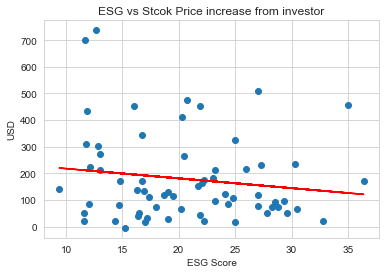

In [20]:
# Plot the Graph of Liner Regression
plt.scatter(M, N)
plt.plot(M, N_pred, color='red')
plt.title('ESG vs Stcok Price increase from investor')
plt.xlabel('ESG Score')
plt.ylabel('USD')
plt.show()

# Split the Data into Training and Testing

In [21]:
from sklearn.model_selection import train_test_split
M_train, M_test, N_train, N_test = train_test_split(M, N, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(M_train, N_train)

LinearRegression()

In [23]:
print(regressor.intercept_)

[265.00619739]


In [24]:
print(regressor.coef_)

[[-3.50139854]]


In [25]:
Test_c=regressor.coef_

In [26]:
# Calculated the balanced accuracy score

test_N_pred = regressor.predict(M_test)


In [27]:

#To compare the actual output values for X_test with the predicted values
NN_pred=pd.DataFrame(list(test_N_pred))
NN_test=pd.DataFrame(list(N_test))
test= pd.concat([NN_pred, NN_test], axis=1, ignore_index=True)


In [28]:
# adding column name to the respective columns
test.columns=( 'Actual', 'Predicted')
test

,Actual,Predicted
0,198.479625,26.545970
1,219.488016,212.289519
2,205.482422,17.117286
3,224.039834,701.256082
4,206.532842,344.921882
5,183.773751,94.154284
6,161.364801,50.919726
7,224.389974,49.474717
8,178.171514,105.464895
9,164.165919,71.602699


In [29]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(N_test, test_N_pred))
print('Mean Squared Error:', metrics.mean_squared_error(N_test, test_N_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(N_test, test_N_pred)))

Mean Absolute Error: 133.4277447932719
Mean Squared Error: 27403.26446357921
Root Mean Squared Error: 165.53931395163872


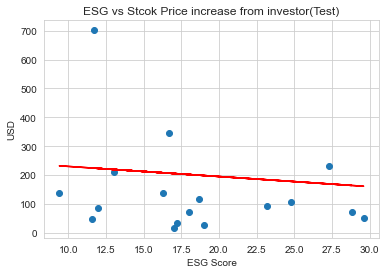

In [30]:
plt.scatter(M_test, N_test)
plt.plot(M_test, test_N_pred, color='red')

plt.title('ESG vs Stcok Price increase from investor(Test)')
plt.xlabel('ESG Score')
plt.ylabel('USD')
plt.show()

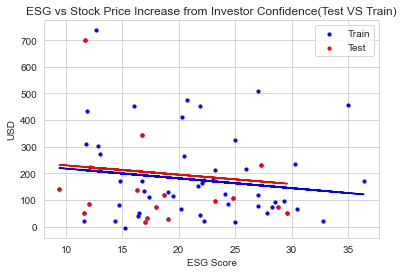

<Figure size 57600x28800 with 0 Axes>

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(M, N, c='b',s=10, marker="o", label='Train')
ax1.scatter(M_test, N_test,s=10, c='r', marker="o", label='Test')
plt.plot(M_test, test_N_pred, color='red')
plt.plot(M, N_pred, color='blue')
plt.legend(loc='upper right')
plt.title('ESG vs Stock Price Increase from Investor Confidence(Test VS Train)')
plt.xlabel('ESG Score')
plt.ylabel('USD')
plt.figure(figsize=(800, 400))
# Saving the figure.

plt.show()
fig.savefig('figure', dpi = 150)

In [32]:
data=M
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 65


# Benefits and Limitation


## Benefit
- All the companies can use this method because sales are always positive. Like the dividend method, if the current year dividend is Zero, we cannot use it.
- No human intervention is needed (automation)
- It shows a negative relationship between the value of Stock Price increase from investor confidence and ESG Score.

## Limitation
- This method is comparable to companies(industry). We need to make sure all the companies in the same industry must have a similar size. ex: Sobey and Walmart are supermarkets, but one is national, and another is global
- The K-value is 0.30, which is higher than 0.05. We cannot use this model to measure how many prices of ESG influences the stock price, but it shows us ESG has a negative relationship with the stock price.
- Our model only uses 2022 information, which can show you a short-term relationship. If we can add past year information, it will establish an exact relationship.

## Improvement
- More Data, Increasing Scope and Time. In this model, we use 89 companies, that are not enough, and we only get the 2022 ESG score because the old information is not for the public. 

## Train and Test
We have 89 stock info, we choose 21 as the Test set and other is Train set


In [34]:


file_to_save = os.path.join("Resources", "ML_model_for_tableau.csv")
ps_df.to_csv(file_to_save, index = False)
